In [2]:
# %load ~/los_projectados/framework_for_labs/scripts/python_lib.py
#!/usr/bin/env python3

import sys
import os
import numpy as np
import subprocess
import pandas as pd
import pyperclip
import math
import matplotlib.pyplot as plt

def build_graph (X:np.array, Y:np.array, x_name:str, y_name:str, x_dim:str = '', y_dim:str = '', name:str = '', no_line:bool = True, color:str = 'black', color_dot:str = 'blue', include_zero:bool = False, dx:np.array = np.array ([]), dy:np.array = np.array ([]), function:str='none', aprx_l=0, aprx_r=0):

    k = -1.0
    b = -1.0

    xlim = min (X) * 0.9
    ylim = min (Y) * 0.8
    if (include_zero):
        xlim = 0
        ylim = 0

    ret = plt.figure (num=1488, figsize=(16, 9), dpi=200)
    ax1 = ret.add_subplot (111)
    ax1.set_title (rf'{name}')
    if (no_line == False): ax1.plot (X, Y, color = color, linestyle = '-', markersize=0, linewidth=0.5)
    ax1.scatter (X, Y, label = rf'{y_name}({x_name})', color = color_dot, marker='+', s=50, linewidths=1)

    if function == 'lin':
        if (aprx_r == 0):
            aprx_r = len (X)

        model = np.poly1d (np.polyfit (X[aprx_l:aprx_r], Y[aprx_l:aprx_r], deg = 1))
        approx = rf'$({str (model[1])}) * x + ({str (model[0])})$'
        k = float (model[1])
        b = float (model[0])
        x_range = np.linspace (min(X) * 0.9, max (X) * 1.1, 2)
        ax1.plot (x_range, model (x_range), '--', color = 'orange', label = approx)

    ax1.legend ()
    ax1.set_xlabel (rf'{x_name}, {x_dim}', size=20)
    ax1.set_ylabel (rf'{y_name}, {y_dim}', size=20)
    ax1.set_xlim (xlim, max (X) * 1.1)
    ax1.set_ylim (ylim, max (Y) * 1.2)
    return (ret, (k, b))



#write_as_column - outputs as table column
#vertical=True - outputs a transponded version
#vertical=False - outputs a non transponded version
#if total_rows > amount of resulting rows then add empty elements
#if total_columns > amount of resulting columns then add empty columns
def arr_to_tex (arr:np.ndarray, outfile:str = '/dev/null', append:bool = False, to_clip:bool = False, precision=2, as_column:bool=False, vertical:bool=False, header:bool=True, col_total:int=0, row_total:int=0, caption:str = ''):
    tex_out =''
    if (header):
        tex_out += '\n\\begin{table}[H]\n\\caption{' + caption + '}\n\\begin{center}\n\\begin{tabular}{|c|*{15}{c|}}\\hline\n'

    if (arr.ndim == 1):
        for i in arr:
            if (isinstance (i, str)): tex_out += i
            else: tex_out += str (round (i, precision))
            tex_out += ' & '
            if (as_column): tex_out += '\n'
        if (as_column): tex_out += ' & \n' * max (0, row_total - len (arr))
        else: tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - len (arr)) + '\\\\\\hline\n'
    elif (arr.ndim == 2):
        if (vertical):
            row_n = arr.shape[0]
            col_n = arr.shape[1]
            for i in range (row_n):
                for j in range (col_n):
                    if (isinstance (arr[j][i], str)): tex_out += arr[j][i]
                    else: tex_out += str (round (arr[j][i], precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total
        else:
            row_n = arr.shape[1]
            col_n = arr.shape[0]
            for i in arr:
                for j in i:
                    if (isinstance (j, str)): tex_out += j
                    else: tex_out += str (round (j, precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total

    if (header): tex_out += '\\end{tabular}\n\\end{center}\n\\end{table}\n\n'

    if (to_clip):
        clip_content = ''
        if (append): clip_content = pyperclip.paste ()
        clip_content += tex_out
        pyperclip.copy (clip_content)

    open_str = 'w'
    if (append): open_str = 'a'

    with open (outfile, open_str) as output:
        print (tex_out, file = output)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 2.2
L = 100 * 10 **-3
R = 0.01

dt_0 = 64.8 * 10 **-6 #sec, zero capacity
C_0 = dt_0 / ((2 * np.pi) ** 2 / L) * 10 **-3

# measurments of period dependent on capacity

C =  np.array ([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]) * 10**-6
dt = np.array ([90.8, 112,    129,   145,   156,   166,  181,    189,   204]) * 10 **-6

C_0

1.6414031750058718e-10

5947.899482590993


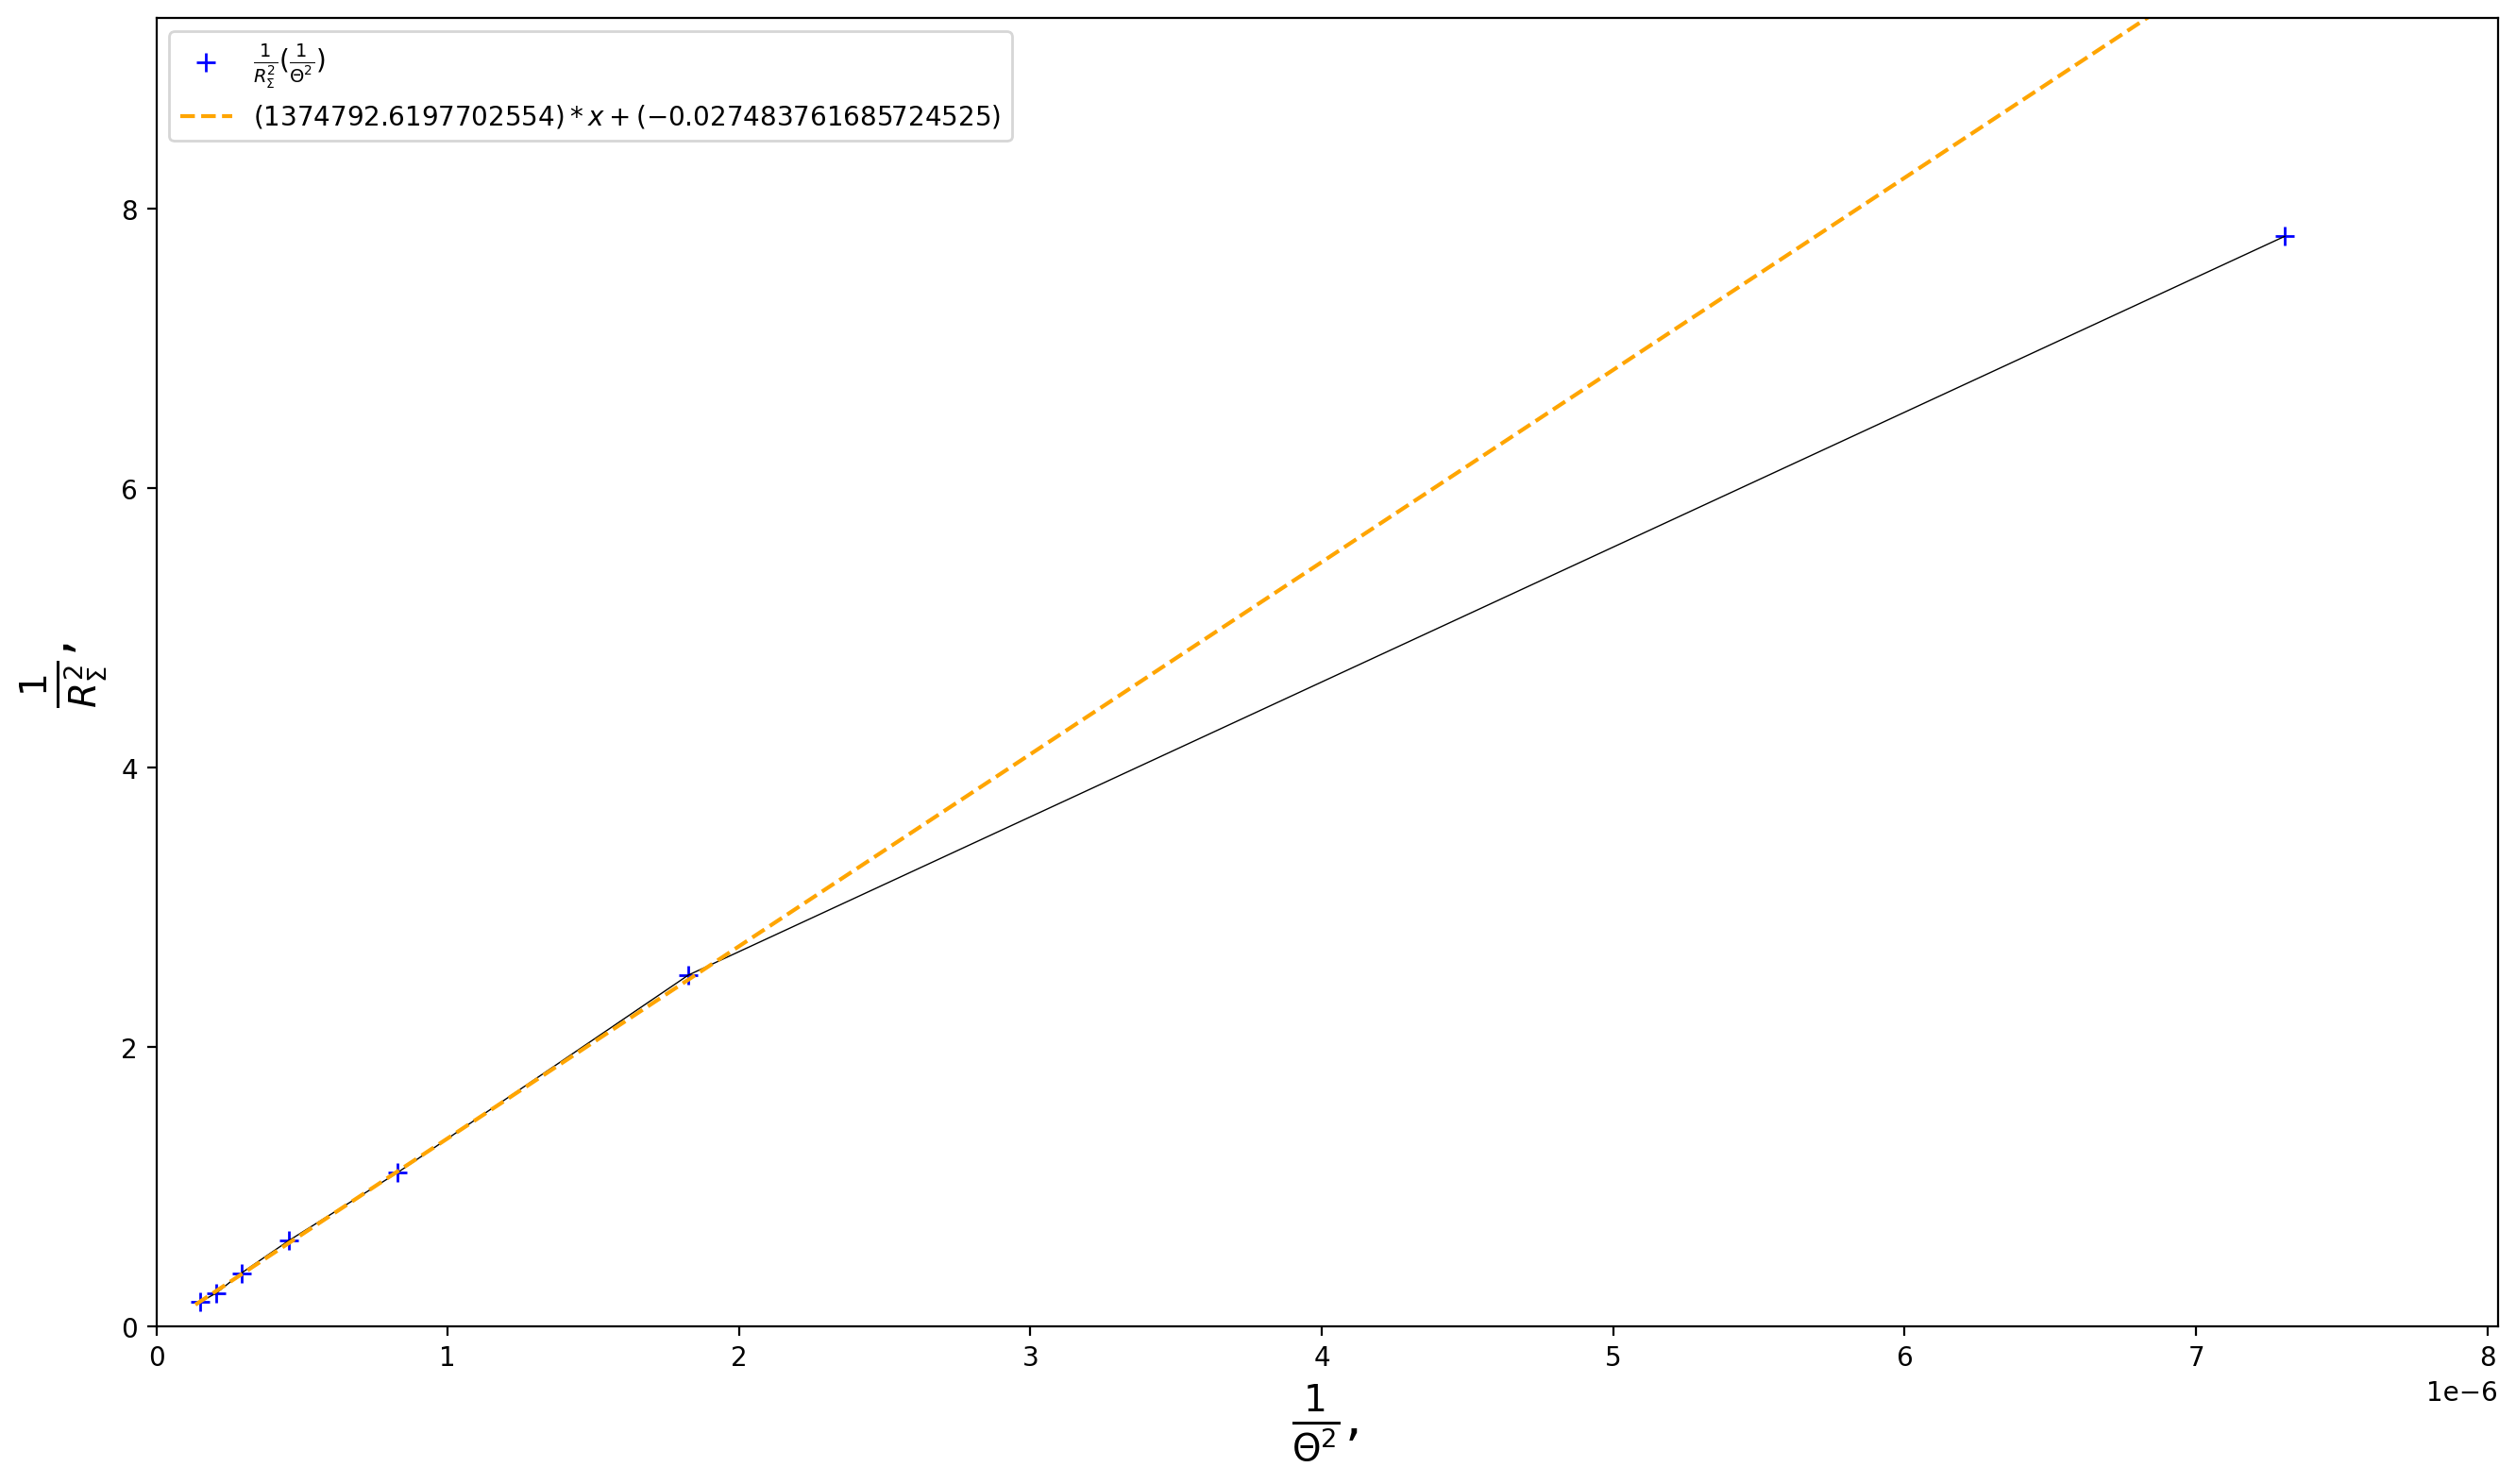

In [46]:
# 2.3

L = 100*10**-3
C_star = 7*10**-9 + 1.6 * 10**-10
dC = (0.1*10**-9) / C_star
dL = (10**-3 ) / L
dR = (dL + dC) / 2
nu = 1 / (2 * np.pi * np.sqrt (L * C_star))
print (nu)

R_cr_teor = 2 * np.sqrt (L/C_star)
R_cr_real = 7400
Sigma_0 = np.log (864 / 604)

R           =                   [370      , 740,  1100, 1480, 1850, 2200, 2590]
Sigma       = np.log (np.array( [864 / 604, 804 / 428, 768 / 296, 728 / 204, 684 / 136, 644 / 84, 612 / 56]))

R = 1 / np.array (R)**2
Sigma = 1 / Sigma**2


(ret, (k, b)) = build_graph (R, Sigma, r'$\frac{1}{\Theta^2}$', r'$\frac{1}{R_{\Sigma}^2}$', include_zero=True, no_line=False, aprx_l=2, function='lin')
ret.savefig ('pics/graph1.png')
# print (k, b)
plt.show ()


k = 2 * np.pi * np.sqrt(k)
# k, R_cr_real, R_cr_teor

In [5]:
# 2.4

C = 0.009 * 10 **(-6)

print (1.0 / (2.0 * np.pi * np.sqrt (0.009 * 10 **-6 * 0.1)))

R =                         [1600,      1200, 800, 600, 400]
Sigma = np.log (np.array (  [204 / 102, 172 / 104, 136 / 96, 108 / 88, 78 / 70]))

5305.164769729845


[5700.         5911.11111111 6122.22222222 6333.33333333 6544.44444444
 6755.55555556 6966.66666667 7177.77777778 7388.88888889 7600.        ]
[5000.         5157.89473684 5315.78947368 5473.68421053 5631.57894737
 5789.47368421 5947.36842105 6105.26315789 6263.15789474 6421.05263158
 6578.94736842 6736.84210526 6894.73684211 7052.63157895 7210.52631579
 7368.42105263 7526.31578947 7684.21052632 7842.10526316 8000.        ]


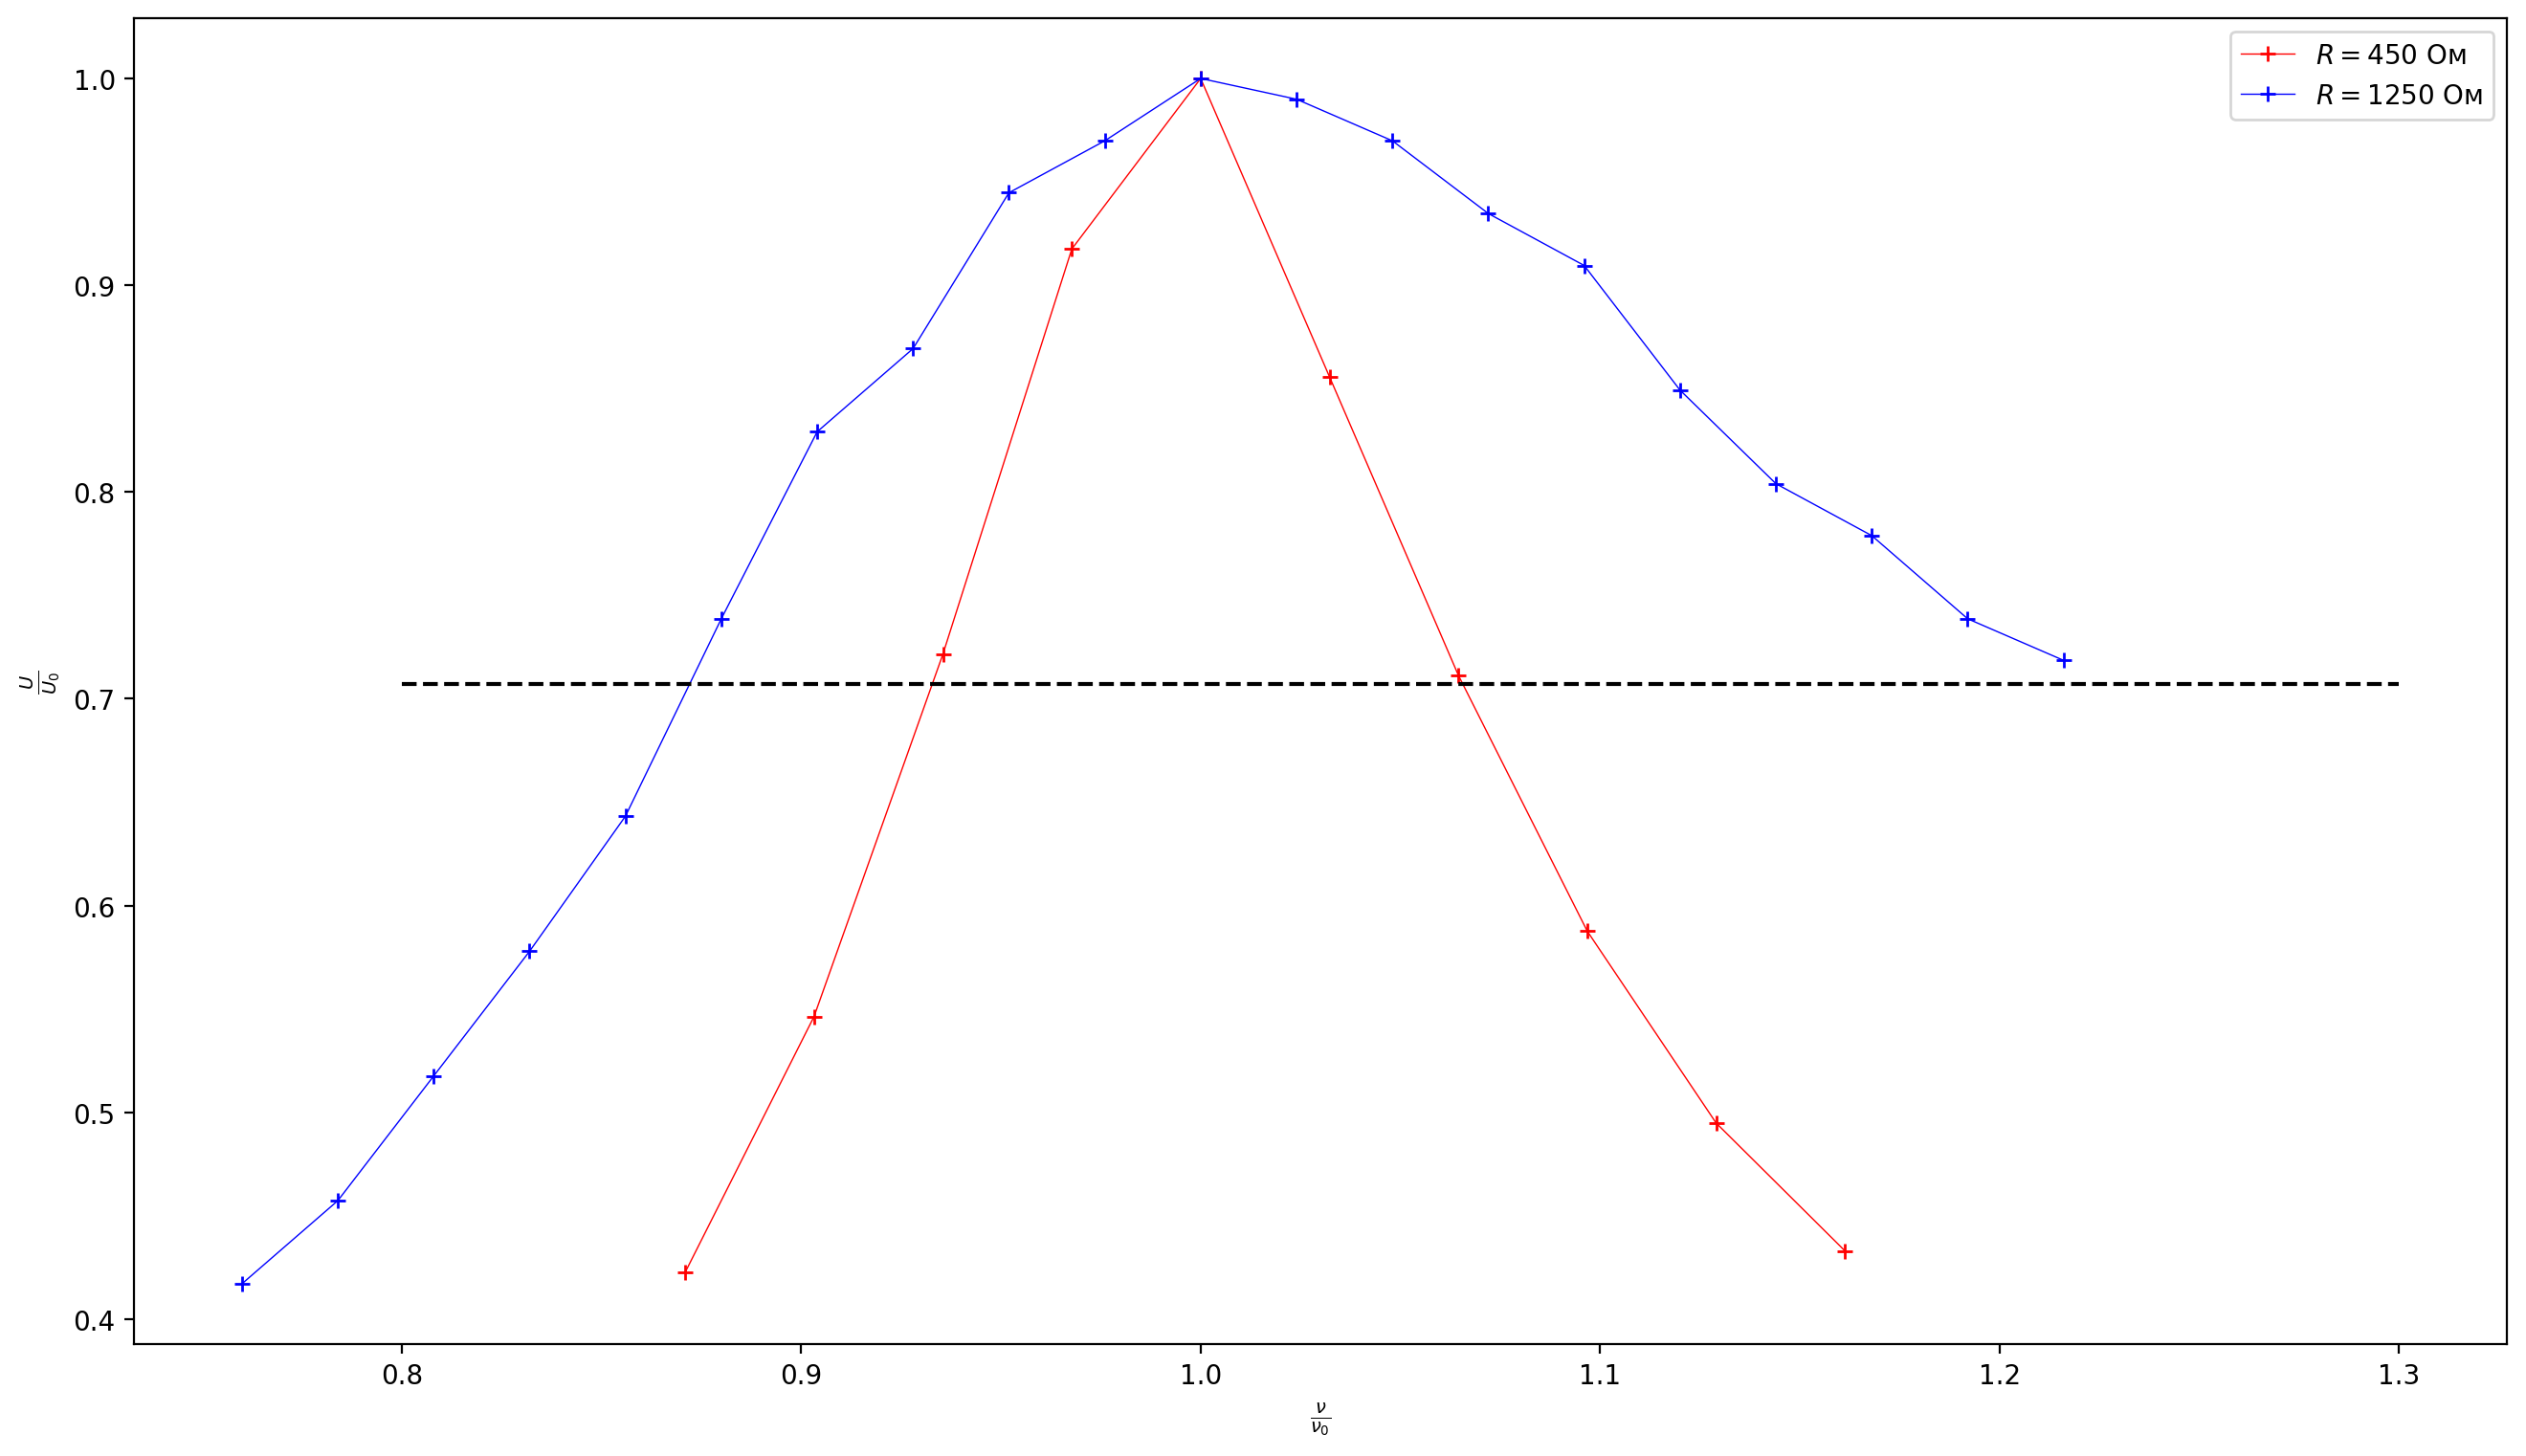

In [6]:
#2.5

freq = 6500
R_1 = 450
U_c_res = 9.7

delta_freq = np.linspace (5700, 7600, num = 10)
print (delta_freq)
U_1 = [4.1, 5.3, 7, 8.9, 9.7, 8.3, 6.9, 5.7, 4.8, 4.2]

# for i in range (len (U)):
#     print (str(delta_freq[i]) + " : " + str (U[i]))

delta_freq = np.array (delta_freq) / 6544.44
U = np.array (U_1) / 9.7

plt.figure (figsize=(16, 9), dpi=200)
plt.ylabel (r'$\frac{U}{U_0}$')
plt.xlabel (r'$\frac{\nu}{\nu_0}$')
plt.plot (delta_freq, U, color = 'red', linestyle = '-', marker = '+', linewidth = 0.5, markersize = 6, label=r'$R = 450$ Ом')

R_2 = 1250

delta_freq_2 = np.linspace (5000, 8000, num = 20)
print (delta_freq_2)
U_2 = [1.66, 1.82, 2.06, 2.3, 2.56, 2.94, 3.3, 3.46, 3.76, 3.86, 3.98, 3.94, 3.86, 3.72, 3.62, 3.38, 3.2, 3.1, 2.94, 2.86]

# for i in range (len (U)):
#     print (str(delta_freq_2[i]) + " : " + str (U[i]))

delta_freq_2 = np.array (delta_freq_2) / 6578.94
U = np.array (U_2) / 3.98

plt.plot (delta_freq_2, U, color = 'blue', linestyle = '-', marker = '+', linewidth = 0.5, markersize = 6, label=r'$R = 1250$ Ом')
plt.plot (np.linspace (0.8, 1.3, 20), [1 / np.sqrt (2)]*20, color = 'black', linestyle='--')
plt.legend ()
plt.show ()



In [7]:
# 2.6

R = 450
U_0 = 9.8

np.set_printoptions (precision=2)
# нарастание [большая, меньшая]
Sigma = [[5.4, 3.4], [6.8, 5.4], [8, 6.9], [8.6, 7.9]]
for i in Sigma:
    print (np.pi / np.log ((U_0 - i[1]) / (U_0 - i[0])))
# убывание
Sigma_1 = [[9.4, 6.3], [6.3, 4.2], [4.2, 3.0], [3, 2]]
# for i in Sigma_1:
#     print (np.pi / np.log (i[0] / i[1]))
#     # print (str(i[0]) + ' & ' + str (i[1]) + ' & ')

R = 1250

U_0 = 4.28
# up
Sigma = [[2.84, 1.2], [3.68, 2.84], [4.08, 3.8]]
for i in Sigma:
    print (str (i[1]) + ' & ' + str (i[0]) + ' & ' + str (np.log ((U_0 - i[1]) / (U_0 - i[0]))) + ' & ' + str (np.pi / np.log ((U_0 - i[1]) / (U_0 - i[0]))))

Sigma_1 = [[4.28, 4], [4, 1.6], [1.6, 0.84]]
for i in Sigma_1:
    print (str (i[0]) + ' & ' + str (i[1]) + ' & ' + str (np.log (i[0]) / (i[1])) + ' & ' + str (np.pi / (np.log (i[0] / i[1]))))

freq = [50, 500, 1500, 6500]
R_c = [9455, 27.8, 17, 4.2]
C = [0.00508, 0.00513, 0.00513, 0.00512] #mf

L = [0.1,  0.09998, 0.09998, 0.101] #Henry
R = [44.6, 44.3, 45.9, 69.5]

8.384434417717333
8.202757719205822
6.587196657573848
6.8364997471213655
1.2 & 2.84 & 0.7602864833975737 & 4.1321169351198
2.84 & 3.68 & 0.8754687373539001 & 3.5884692617182896
3.8 & 4.08 & 0.8754687373538999 & 3.5884692617182905
4.28 & 4 & 0.36348825239842636 & 46.43297973659121
4 & 1.6 & 0.8664339756999315 & 3.42859809043803
1.6 & 0.84 & 0.5595281300544472 & 4.875546589355096
